
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [113]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [114]:
import sklearn
sklearn.__version__

'0.24.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [115]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', as_frame=False, return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

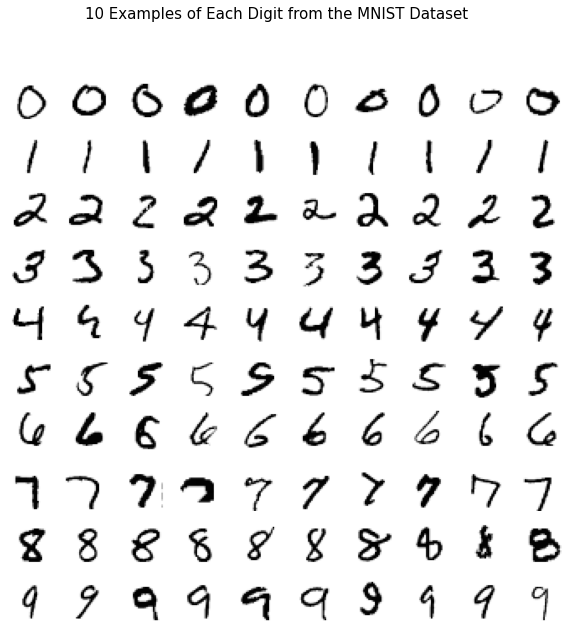

In [32]:
def Q1(num_examples=10):
  ### STUDENT START ###
    
    #Since this is supervised learning, it has labels which we are using to get all the unique digits.
    digits = np.unique(Y)
    
    #To plot every number
    fig, axes = plt.subplots(num_examples, num_examples, figsize=(10,10))
    
    #Plot title
    plt.suptitle("10 Examples of Each Digit from the MNIST Dataset", fontsize = 15)
    
    #For loop loops over each digit from 'digits' above
    for i, dig in enumerate(digits):
        
        #number of examples of each digit
        for j in range(num_examples):
            
            #Reshape image
            image = mini_train_data[mini_train_labels == dig][j].reshape(28,28)
            
            #Plot subplot and make it to the color map corresponding to black and white
            axes[i,j].imshow(image, cmap = 'Greys')
            
            #Remove subplot axes
            axes[i,j].axis('off')

  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [43]:
def Q2(k_values):

### STUDENT START ###
    for k in k_values:
        #define knn classifiers and put in mini train data and labels
        knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        knn.fit(mini_train_data, mini_train_labels)
        
        #obtain classification report as it has all the measures requested: precision, recall, f1 score and support
        if k == 1:
            print('Classification Report for k=1')
            print(classification_report(dev_labels, knn.predict(dev_data)))
            
        else:
            #use the function score to obtain accuracies
            print(f'\n Accuracy for k={k}: {knn.score(dev_data, dev_labels)}')
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

Classification Report for k=1
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        83
           1       0.84      1.00      0.91       107
           2       0.96      0.84      0.90        96
           3       0.88      0.79      0.83       101
           4       0.89      0.84      0.86        85
           5       0.84      0.88      0.86        83
           6       0.97      0.92      0.95       104
           7       0.88      0.92      0.90       118
           8       0.85      0.81      0.83       115
           9       0.81      0.83      0.82       108

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


 Accuracy for k=3: 0.869

 Accuracy for k=5: 0.867

 Accuracy for k=7: 0.856

 Accuracy for k=9: 0.845


Answer to part 4: 

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Train size = 100
Accuracy: 0.702 
Time needed to train: 0.01 
Time needed to evaluate accuracy: 0.058 

Train size = 200
Accuracy: 0.791 
Time needed to train: 0.0 
Time needed to evaluate accuracy: 0.032 

Train size = 400
Accuracy: 0.811 
Time needed to train: 0.001 
Time needed to evaluate accuracy: 0.039 

Train size = 800
Accuracy: 0.866 
Time needed to train: 0.001 
Time needed to evaluate accuracy: 0.051 

Train size = 1600
Accuracy: 0.905 
Time needed to train: 0.002 
Time needed to evaluate accuracy: 0.076 

Train size = 3200
Accuracy: 0.927 
Time needed to train: 0.007 
Time needed to evaluate accuracy: 0.121 

Train size = 6400
Accuracy: 0.939 
Time needed to train: 0.008 
Time needed to evaluate accuracy: 0.239 

Train size = 12800
Accuracy: 0.952 
Time needed to train: 0.024 
Time needed to evaluate accuracy: 0.494 

Train size = 25600
Accuracy: 0.963 
Time needed to train: 0.035 
Time needed to evaluate accuracy: 0.925 



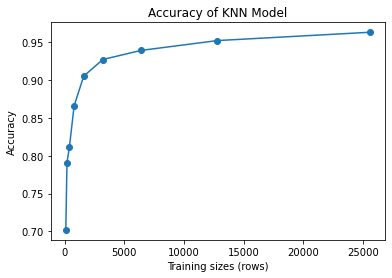

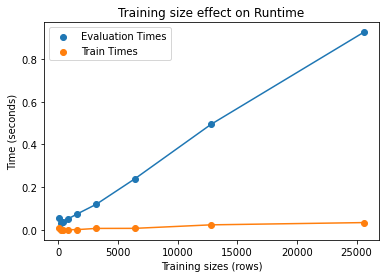

In [116]:
def Q3(train_sizes, accuracies,train_times, eval_times):

### STUDENT START ###
    for i in train_sizes:
        tTrain = train_data[:i]
        tLabels = train_labels[:i]
        
        #define knn classifier
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric = 'minkowski')
        #get the time required to train
        start = time.time()
        knn.fit(tTrain, tLabels)
        end = time.time()
        Ttime = end - start
        train_times.append(Ttime)
        
        start_eval = time.time()
        #get the time for accuracy measures
        accuracy = knn.score(dev_data, dev_labels)
        end_eval = time.time()
        time_eval = end_eval - start_eval
        eval_times.append(time_eval)
        accuracies.append(accuracy)
    
    for x in range (0, len(train_sizes)):
        print("Train size =", train_sizes[x])
        print("=======================================")
        print(f'Accuracy: {accuracies[x]} \nTime needed to train: {round(train_times[x], 3)} \nTime needed to evaluate accuracy: {round(eval_times[x], 3)} \n')
        
    
    #plot 1 - for accuracies
    plt.scatter(train_sizes, accuracies)
    plt.plot(train_sizes, accuracies)
    plt.title("Accuracy of KNN Model")
    
    plt.xlabel("Training sizes (rows)")
    plt.ylabel("Accuracy")
    plt.show()
    
    #plot 2 - for evaluation times of accuracies and training times
    plt.scatter(train_sizes, eval_times, label="Evaluation Times")
    plt.plot(train_sizes, eval_times)
    plt.scatter(train_sizes, train_times, label="Train Times")
    plt.plot(train_sizes, train_times)
    plt.legend()
    plt.title("Training size effect on Runtime")
    
    plt.xlabel("Training sizes (rows)")
    plt.ylabel("Time (seconds)")
    
    plt.show()
    
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

Unadjusted Model
R2 of unadjusted linear regression model is 0.4177006634161019.
Predicted accuracy of train size 60000 is [1.23617317]
Predicted accuracy of train size 120000 is [1.63742805]
Predicted accuracy of train size 1000000 is [7.52249967]

Adjusted Model
R2 of adjusted/transformed linear regression model is 0.899168851820151.
Predicted accuracy of train size 60000 is [0.73873528]
Predicted accuracy of train size 120000 is [0.74517663]
Predicted accuracy of train size 1000000 is [0.76488005]


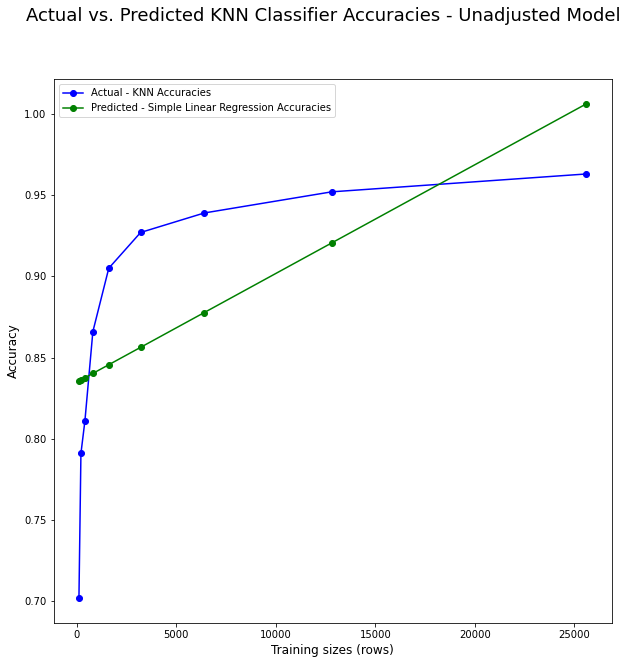

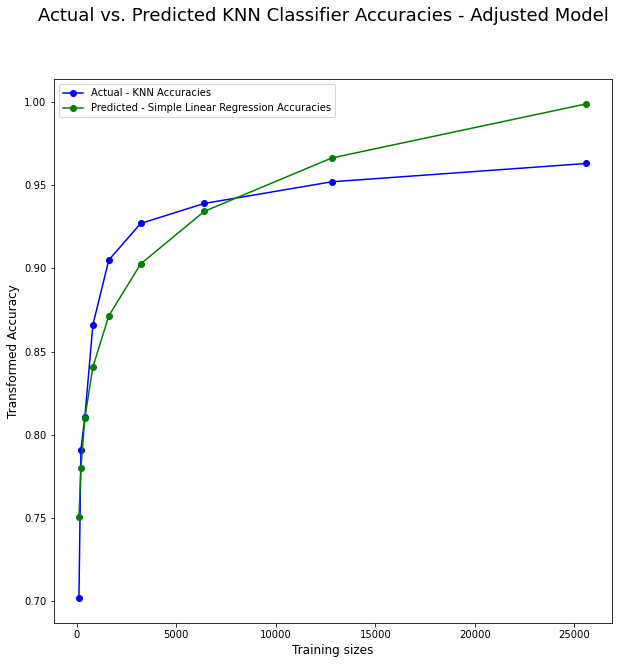

In [165]:
def Q4():

### STUDENT START ###
    
    #convert to arrays
    train_array = np.array(train_sizes).reshape(-1,1)
    additional_sizes_array = np.array(additional_sizes).reshape(-1,1)
    
    
    #4.1 Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size.
    print("Unadjusted Model")
    print("================================================================")
    
    #model that underwent linear regression
    regression = sklearn.linear_model.LinearRegression().fit(train_array, accuracies)
    
    #4.2 Print  𝑅2  of the linear regression model.
    reg_score = regression.score(train_array, accuracies)
    print(f'R2 of unadjusted linear regression model is {reg_score}.')
    
    #4.3 Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.
    print('Predicted accuracy of train size 60000 is {}'.format(regression.predict(np.array([[60000]]))))
    print('Predicted accuracy of train size 120000 is {}'.format(regression.predict(np.array([[120000]]))))
    print('Predicted accuracy of train size 1000000 is {}'.format(regression.predict(np.array([[1000000]]))))
    
    predicted_accuracies = regression.predict(train_array)
    
    
    #4.4 Plot on a lineplot graph
    fig1, axs1 = plt.subplots(1,1, figsize = (10,10))
    fig1.suptitle("Actual vs. Predicted KNN Classifier Accuracies - Unadjusted Model", fontsize = 18)
    axs1.plot(train_sizes, accuracies, marker = 'o', color = 'blue', label = "Actual - KNN Accuracies")
    axs1.plot(train_sizes, predicted_accuracies, marker = 'o', color = 'green', label = "Predicted - Simple Linear Regression Accuracies")
    axs1.set_xlabel("Training sizes (rows)", fontsize = 12)
    plt.ylabel("Accuracy", fontsize = 12)
    plt.legend()
    
    #4.6 Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues.
    
    #transformation functions
    logit_transformation = lambda x: np.exp(x)/(1+ np.exp(x))
    logistic_transformation = lambda x: np.log(x/(1-x))
    
    #log transformed training sizes - x axis
    log_train = np.log(train_sizes).reshape(-1,1)
    
    #y axis transformation of accuracies
    transform_accuracies = []
    for i in accuracies:
        transform_accuracies.append(logit_transformation(i))
    
    #model that underwent linear regression
    transformed_model = LinearRegression()
    transformed_model.fit(log_train, transform_accuracies)
    predict_transform_accuracies = transformed_model.predict(log_train)
    
    #apply logistic function
    transform_logistic = np.vectorize(logistic_transformation)
    predict_transform_accuracies = transform_logistic(predict_transform_accuracies)
    
    #4.7 Show  𝑅2  of the improved linear regression model.
    print("")
    print("Adjusted Model")
    print("================================================================")
    
    reg_score_2 = transformed_model.score(log_train, transform_accuracies)
    print(f'R2 of adjusted/transformed linear regression model is {reg_score_2}.')
    
    #4.8 Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.
    print('Predicted accuracy of train size 60000 is {}'.format(transformed_model.predict(np.log([[60000]]))))
    print('Predicted accuracy of train size 120000 is {}'.format(transformed_model.predict(np.log([[120000]]))))
    print('Predicted accuracy of train size 1000000 is {}'.format(transformed_model.predict(np.log([[1000000]]))))
    
    #4.9 Plot on a lineplot graph
    fig2, axs2 = plt.subplots(1,1, figsize = (10,10))
    fig2.suptitle("Actual vs. Predicted KNN Classifier Accuracies - Adjusted Model", fontsize = 18)
    axs2.plot(train_sizes, accuracies , marker = 'o', color = 'blue', label = "Actual - KNN Accuracies")
    axs2.plot(train_sizes, predict_transform_accuracies, marker = 'o', color = 'green', label = "Predicted - Simple Linear Regression Accuracies")
    axs2.set_xlabel("Training sizes", fontsize = 12)
    plt.ylabel("Transformed Accuracy", fontsize = 12)
    plt.legend()
### STUDENT END ###

Q4()

Answer to part 5:  

1. Predicted accuracies of the unadjusted model are over 1 for the added training sets. 
2. The shape of the linear line and evidentally not fitting the shape that the actual values give. 

We can see both of these issues rectified with the transformed model.

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

11 examples of digit 4 mislabeled as digit 9.


IndexError: index 82 is out of bounds for axis 0 with size 82

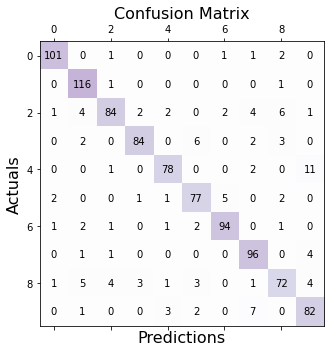

In [194]:
def Q5():

### STUDENT START ###
    
    #define knn classifier
    knn = KNeighborsClassifier(n_neighbors= 1, p = 2, metric = "minkowski")
    knn.fit(mini_train_data, mini_train_labels)
    
    #predict from dev data
    predict_labels = knn.predict(dev_data)
    
    #compare labels predicted by model against actuals
    matrix = confusion_matrix(dev_labels, predict_labels)
    matrix_df = pd.DataFrame(matrix, columns = range(10), index=range(10))
    
    #plot base/outline
    fig, ax = plt.subplots(figsize=(5,5))
    ax.matshow(matrix, cmap = plt.cm.Purples, alpha = 0.3)
    
    #populate matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')
    
    #highest misclassified number
    highestMisclassification = 0
    
    for row in range(matrix.shape[0]):
        for column in range(matrix.shape[1]):
            if row != column & highestMisclassification < matrix [row, column]:
                highestMisclassification = matrix[row,column]
                actualDig = row
                misclassifiedDig = column
    
    #plot labels
    plt.title("Confusion Matrix", fontsize= 16)
    plt.xlabel("Predictions", fontsize=16)
    plt.ylabel("Actuals", fontsize=16)
    plt.tight_layout()
    plt.show
    
    #transformations to identify apprpopriate misclassified digs
    misclassifiedDigs = np.where(dev_labels != predict_labels)
    misclassifiedDigs = np.where(dev_labels == str(actualDig))
    misclassifiedDigs = np.where(predict_labels == str(misclassifiedDig))
    
    #show examples of misclassified digit
    #code in progress that I could not figure out before submission :( - hopefully it is close.
    print("11 examples of digit 4 mislabeled as digit 9.")
    fig2, ax2 = plt.subplots(1, highestMisclassification, figsize = (5,5))
    plt.rc("image", cmap = "Blues")
    for i, data in enumerate(misclassifiedDigs[0]):
        image = dev_data[data, :].reshape(28,28)
        ax2[i].imshow(image)
        ax2[i].axis("off")
### STUDENT END ###

Q5()


Answer to part 3: 4's are most often misclassified as 9's.
